In [1]:
import os,sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ren_data_dir=r'G:\Shared drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\Renewable Generation Data - ABB Velocity Suite'
dem_data_dir='G:\Shared drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\ResStock\ResStock_update_20200617\scaling_factors\Other_load(using  scaled_other_load KW)'

In [63]:
#region = 'CA' 
#region = 'TX'
region = 'NewEngland'
vre_files = {'CA':'CAISO_2016_scaled_IID_imputed.csv', 
             'TX': 'ERCOT_2016_imputed.csv',
             'NewEngland':'ISO-NE-Ren.csv'}
ymax = {'CA':55, 'TX':65, 'NewEngland':25}
load_file = 'Gross_load_{}_scenario_0_VS_1.csv'.format(region)

In [64]:
vre = pd.read_csv(os.path.join(ren_data_dir,vre_files[region]), index_col=0)
vre.head()

Datetime  Sum Generation MW
hour_beginning                                
0               1/1/16 0:00           359.0909
1               1/1/16 1:00           313.4000
2               1/1/16 2:00           314.7500
3               1/1/16 3:00           349.6000
4               1/1/16 4:00           350.8333

<AxesSubplot:xlabel='hour_beginning'>

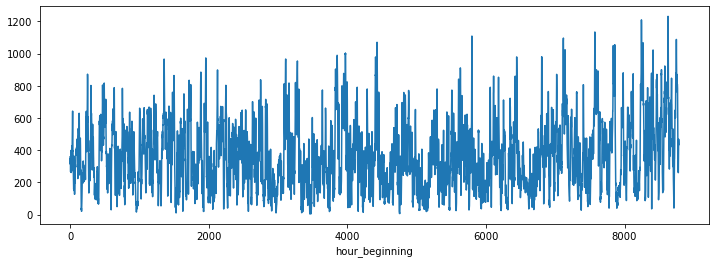

In [65]:
fig,ax = plt.subplots(figsize=[12,4])
vre['Sum Generation MW'].plot()

In [66]:
load = pd.read_csv(os.path.join(dem_data_dir, load_file ))
load.head()

hour            Date/Time  day_of_year                 date  month  \
0     0  2016-01-01 01:00:00            1  2016-01-01 00:00:00      1   
1     1  2016-01-01 02:00:00            1  2016-01-01 01:00:00      1   
2     2  2016-01-01 03:00:00            1  2016-01-01 02:00:00      1   
3     3  2016-01-01 04:00:00            1  2016-01-01 03:00:00      1   
4     4  2016-01-01 05:00:00            1  2016-01-01 04:00:00      1   

   weekend  commercial_load_kwh  residential_load_kwh  ComAndRes_load_kwh  \
0    False         4.424926e+06          5.103124e+06        9.528050e+06   
1    False         4.355191e+06          4.668708e+06        9.023899e+06   
2    False         4.447445e+06          4.492278e+06        8.939723e+06   
3    False         5.026662e+06          4.434545e+06        9.461206e+06   
4    False         6.410331e+06          4.415346e+06        1.082568e+07   

   residential_load_kwh_EE  ...  Raw EIA load/MW  Daytime EIA load/MW  \
0             2.962095e+06  ...            12503                    0   
1             2.689198e+06  ...            12241                    0   
2             2.582729e+06  ...            11824                    0   
3             2.557361e+06  ...            11616                    0   
4             2.545579e+06  ...            11626                    0   

   raw other load/KW  scaled_res_kwh  scaled_com_kwh  \
0         12503000.0    3.269826e+06    3.359640e+06   
1         12241000.0    2.991474e+06    3.393983e+06   
2         11824000.0    2.878427e+06    3.455791e+06   
3         11616000.0    2.841434e+06    3.585451e+06   
4         11626000.0    2.829132e+06    3.815265e+06   

   scaled_res_kwh_nighttime0  scaled_com_kwh_nighttime0  scaled_res_kwh_EE  \
0                        0.0                        0.0       1.897962e+06   
1                        0.0                        0.0       1.723103e+06   
2                        0.0                        0.0       1.654883e+06   
3                        0.0                        0.0       1.638629e+06   
4                        0.0                        0.0       1.631080e+06   

   scaled_other_load/KW  EIA load consider EE/MW  
0          5.873534e+06             11131.135966  
1          5.855543e+06             10972.629307  
2          5.489783e+06             10600.456862  
3          5.189115e+06             10413.194760  
4          4.981603e+06             10427.947411  

[5 rows x 21 columns]

<AxesSubplot:>

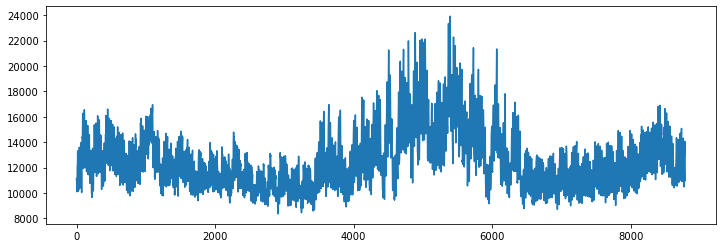

In [67]:
fig,ax = plt.subplots(figsize=[12,4])
load['EIA load consider EE/MW'].plot()

(0.0, 8784.0)

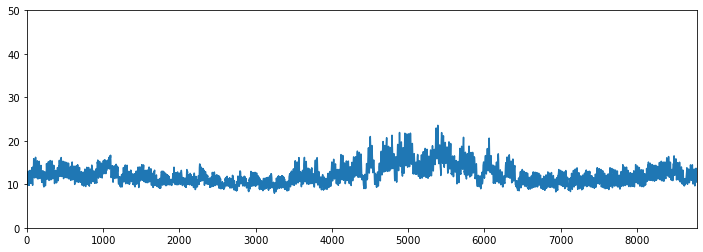

In [68]:

netload = (load['EIA load consider EE/MW'] - vre['Sum Generation MW'])/1000
fig,ax = plt.subplots(figsize=[12,4])
netload.plot()
ax.set_ylim([0,50])
ax.set_xlim([0,8784])

In [69]:
netload.rank()

0       2415.0
1       2277.0
2       1737.0
3       1414.0
4       1431.0
         ...  
8779    5047.0
8780    3967.0
8781    3206.0
8782    2507.0
8783    2090.0
Length: 8784, dtype: float64

In [70]:
ramp=netload.diff(3).abs()
ramp_hours = ramp.index[ramp.rank(ascending=False)<=100]
ramp_hours

Int64Index([  79,  103,  319,  655,  775, 2262, 3646, 3791, 3814, 4126, 4150,
            4343, 4367, 4509, 4510, 4511, 4664, 4677, 4678, 4679, 4711, 4712,
            4713, 4726, 4737, 4785, 4786, 4798, 4870, 4881, 4882, 4883, 4893,
            4894, 4915, 4916, 4917, 4952, 4953, 4954, 4955, 4966, 4989, 4990,
            4991, 5013, 5014, 5015, 5024, 5025, 5026, 5038, 5039, 5206, 5241,
            5302, 5326, 5361, 5362, 5373, 5374, 5385, 5386, 5387, 5397, 5432,
            5433, 5434, 5435, 5445, 5446, 5447, 5469, 5470, 5471, 5494, 5518,
            5542, 5566, 5686, 5710, 5720, 5732, 5733, 5734, 5782, 5805, 5806,
            5829, 5830, 5854, 6045, 6069, 6070, 6189, 6190, 6333, 6357, 6381,
            8407],
           dtype='int64')

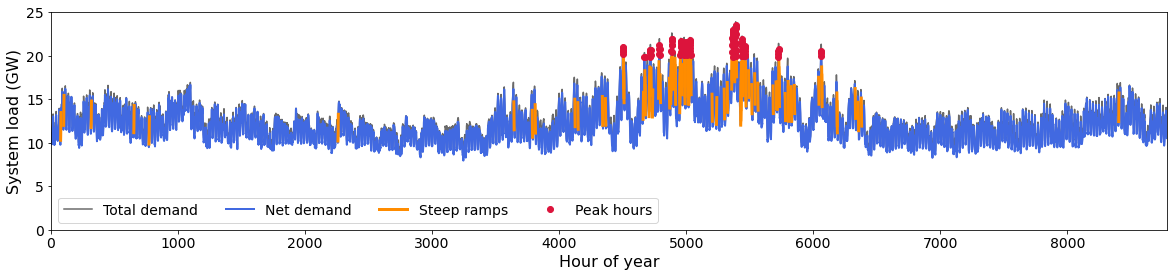

In [71]:
fig,ax = plt.subplots(figsize=[20,4])
load['EIA load consider EE/MW'].div(1000).plot(ax=ax, color='dimgray', label='Total demand')
netload.plot(ax=ax, color='royalblue', linewidth=2, label='Net demand')
label='Steep ramps'
for h in ramp_hours:
    netload.loc[h-3:h].plot(ax=ax, color='darkorange', linewidth=3, label=label)
    label='_nolegend_'

netload.loc[netload.rank(ascending=False)<=100].plot(marker='o', linestyle='', ax=ax, color='crimson', label='Peak hours')
ax.set_ylim([0,ymax[region]])
ax.set_xlim([0,8784])
ax.set_xlabel('Hour of year', fontsize=16)
ax.set_ylabel('System load (GW)', fontsize=16)
ax.tick_params(which='both', labelsize=14)
ax.legend(fontsize=14, ncol=4)

<AxesSubplot:>

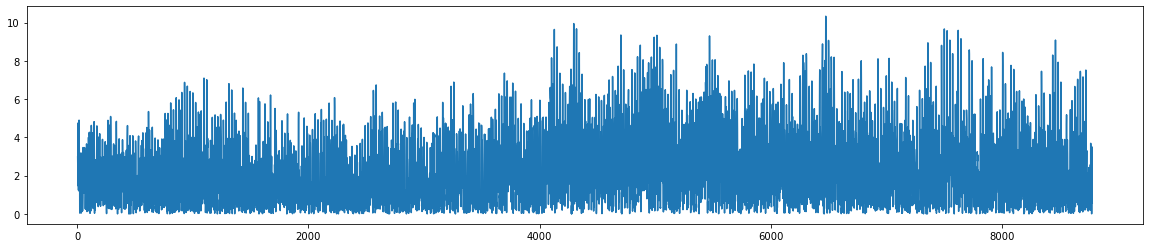

In [62]:
fig,ax = plt.subplots(figsize=[20,4])
ramp.plot()